In [27]:
%%shell
nvcc lab3_ex2_template.cu -o matrix_multiplication

In [31]:
%%shell
./matrix_multiplication 256 256 256


Input matrix dim (256 x 256) (256 x 256) (256 x 256)
Copy to device time: 0.000302 seconds
Kernel time: 0.000463 seconds
Copy to host time: 0.000408 seconds
graph: identical upper and lower x limits are separated
graph: identical upper and lower y limits are separated


In [50]:
# 运用 nsys profile 分析刚编译好的可执行文件
%%shell
nsys profile --stats=true ./matrix_multiplication 256 256 256


Input matrix dim (256 x 256) (256 x 256) (256 x 256)
Copy to device time: 0.000394 seconds
Kernel time: 0.000466 seconds
Copy to host time: 0.000510 seconds
Generating '/tmp/nsys-report-481b.qdstrm'
[1/8] [========================100%] report1.nsys-rep
[2/8] [========================100%] report1.sqlite
[3/8] Executing 'nvtx_sum' stats report
SKIPPED: /content/report1.sqlite does not contain NV Tools Extension (NVTX) data.
[4/8] Executing 'osrt_sum' stats report

 Time (%)  Total Time (ns)  Num Calls    Avg (ns)     Med (ns)    Min (ns)   Max (ns)    StdDev (ns)        Name     
 --------  ---------------  ---------  ------------  -----------  --------  -----------  ------------  --------------
     55.3      200,697,354         13  15,438,258.0  3,146,004.0     2,875  100,210,692  29,069,436.3  poll          
     43.4      157,513,124        513     307,043.1     17,664.0       636  114,299,505   5,050,471.4  ioctl         
      0.7        2,361,958         31      76,192.2      8,6

In [51]:
%%shell
nsys profile --stats=true ./matrix_multiplication 511 1023 4094

Input matrix dim (511 x 1023) (1023 x 4094) (511 x 4094)
Copy to device time: 0.008179 seconds
Kernel time: 0.047763 seconds
Copy to host time: 0.011023 seconds
Generating '/tmp/nsys-report-cd62.qdstrm'
[1/8] [========================100%] report2.nsys-rep
[2/8] [========================100%] report2.sqlite
[3/8] Executing 'nvtx_sum' stats report
SKIPPED: /content/report2.sqlite does not contain NV Tools Extension (NVTX) data.
[4/8] Executing 'osrt_sum' stats report

 Time (%)  Total Time (ns)  Num Calls    Avg (ns)     Med (ns)    Min (ns)   Max (ns)    StdDev (ns)        Name     
 --------  ---------------  ---------  ------------  -----------  --------  -----------  ------------  --------------
     57.7      200,348,056         13  15,411,388.9  2,407,247.0     3,315  100,161,897  28,880,120.5  poll          
     41.2      142,977,900        527     271,305.3     13,615.0       439  109,445,716   4,768,986.2  ioctl         
      0.6        2,029,106         31      65,455.0     

In [30]:
%%shell
./matrix_multiplication 1024 1024 1024

Input matrix dim (1024 x 1024) (1024 x 1024) (1024 x 1024)
Copy to device time: 0.003889 seconds
Kernel time: 0.023979 seconds
Copy to host time: 0.005516 seconds
graph: identical upper and lower x limits are separated
graph: identical upper and lower y limits are separated


In [33]:
%%shell
./matrix_multiplication 2048 1024 2048

Input matrix dim (2048 x 1024) (1024 x 2048) (2048 x 2048)
Copy to device time: 0.007622 seconds
Kernel time: 0.095284 seconds
Copy to host time: 0.025426 seconds
graph: identical upper and lower x limits are separated
graph: identical upper and lower y limits are separated


In [36]:
%%shell
nvcc lab3_ex2_template_float.cu -o matrix_multiplication_float

In [37]:
%%shell
./matrix_multiplication_float 256 256 256

Input matrix dim (256 x 256) (256 x 256) (256 x 256)
Mismatch at index 2: 74.774544 != 74.774559
Copy to device time: 0.000224 seconds
Kernel time: 0.000188 seconds
Copy to host time: 0.000275 seconds
graph: identical upper and lower x limits are separated
graph: identical upper and lower y limits are separated


In [38]:
%%shell
./matrix_multiplication_float 1024 1024 1024

Input matrix dim (1024 x 1024) (1024 x 1024) (1024 x 1024)
Mismatch at index 3: 261.541840 != 261.541809
Copy to device time: 0.002099 seconds
Kernel time: 0.009197 seconds
Copy to host time: 0.002926 seconds
graph: identical upper and lower x limits are separated
graph: identical upper and lower y limits are separated


In [39]:
%%shell
./matrix_multiplication_float 2048 1024 2048

Input matrix dim (2048 x 1024) (1024 x 2048) (2048 x 2048)
Mismatch at index 2: 267.235596 != 267.235565
Copy to device time: 0.003814 seconds
Kernel time: 0.037398 seconds
Copy to host time: 0.011318 seconds
graph: identical upper and lower x limits are separated
graph: identical upper and lower y limits are separated


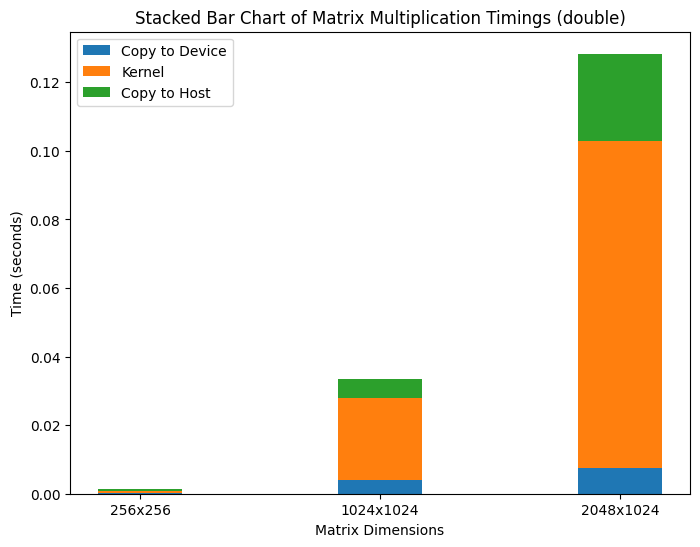

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# 输入矩阵的维度
matrix_dimensions = ['256x256', '1024x1024', '2048x1024']

# 时间数据
copy_to_device_time = [0.000330, 0.003889, 0.007622]
kernel_time = [0.000466, 0.023979, 0.095284]
copy_to_host_time = [0.000469, 0.005516, 0.025426]

# 绘制stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
bar_positions = np.arange(len(matrix_dimensions))

ax.bar(bar_positions, copy_to_device_time, bar_width, label='Copy to Device')
ax.bar(bar_positions, kernel_time, bar_width, bottom=copy_to_device_time, label='Kernel')
ax.bar(bar_positions, copy_to_host_time, bar_width, bottom=np.array(copy_to_device_time) + np.array(kernel_time), label='Copy to Host')

# 添加标签和标题
ax.set_xlabel('Matrix Dimensions')
ax.set_ylabel('Time (seconds)')
ax.set_title('Stacked Bar Chart of Matrix Multiplication Timings (double)')
ax.set_xticks(bar_positions)
ax.set_xticklabels(matrix_dimensions)
ax.legend()

# 显示图形
plt.show()


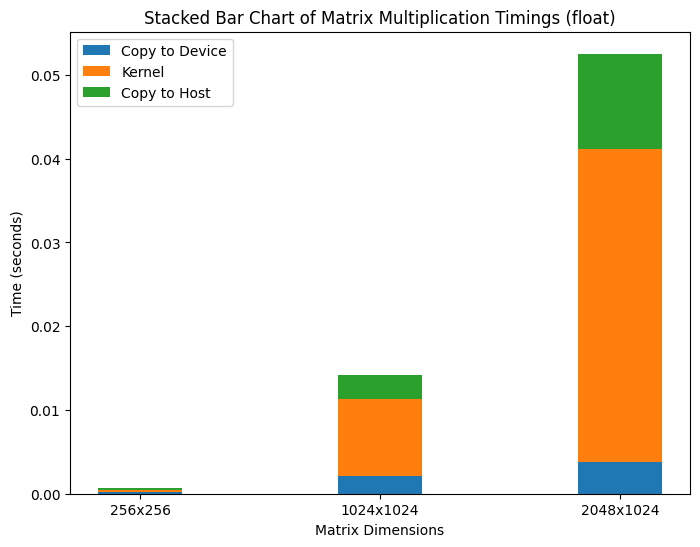

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# 输入矩阵的维度
matrix_dimensions = ['256x256', '1024x1024', '2048x1024']

# 时间数据
copy_to_device_time = [0.000224, 0.002099, 0.003814]
kernel_time = [0.000188, 0.009197, 0.037398]
copy_to_host_time = [0.000275, 0.002926, 0.011318]

# 绘制stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
bar_positions = np.arange(len(matrix_dimensions))

ax.bar(bar_positions, copy_to_device_time, bar_width, label='Copy to Device')
ax.bar(bar_positions, kernel_time, bar_width, bottom=copy_to_device_time, label='Kernel')
ax.bar(bar_positions, copy_to_host_time, bar_width, bottom=np.array(copy_to_device_time) + np.array(kernel_time), label='Copy to Host')

# 添加标签和标题
ax.set_xlabel('Matrix Dimensions')
ax.set_ylabel('Time (seconds)')
ax.set_title('Stacked Bar Chart of Matrix Multiplication Timings (float)')
ax.set_xticks(bar_positions)
ax.set_xticklabels(matrix_dimensions)
ax.legend()

# 显示图形
plt.show()
